In [1]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading Data
data = pd.read_csv('data.csv')

In [3]:
#Removing Rows which did not recur
data_recurring = data[data['Recurred'] != 0]

In [4]:
#Data Preprocessing
data_for_pfs = data.drop(['ID'], axis=1)
# Handle missing values
data_for_pfs = data_for_pfs.dropna()

In [5]:
#Preparing Data for Model
# Encode categorical variables
data_for_pfs_encoded = pd.get_dummies(data_for_pfs, columns=['Grade', 'Endometrioid_Histology', 'PathologicStage', 'MolecularCategorization'])

# Split the data into features (X) and target variable (y)
X = data_for_pfs_encoded.drop(['Recurred', 'PFS'], axis=1)
y = data_for_pfs_encoded['PFS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#Running Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [7]:
#Prediction
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 498.48246750069006


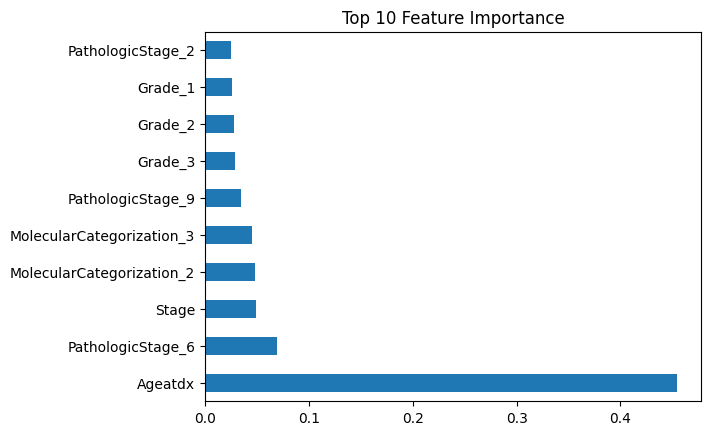

In [8]:
# Top 10 Features Important in Predicting PFS
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.show()

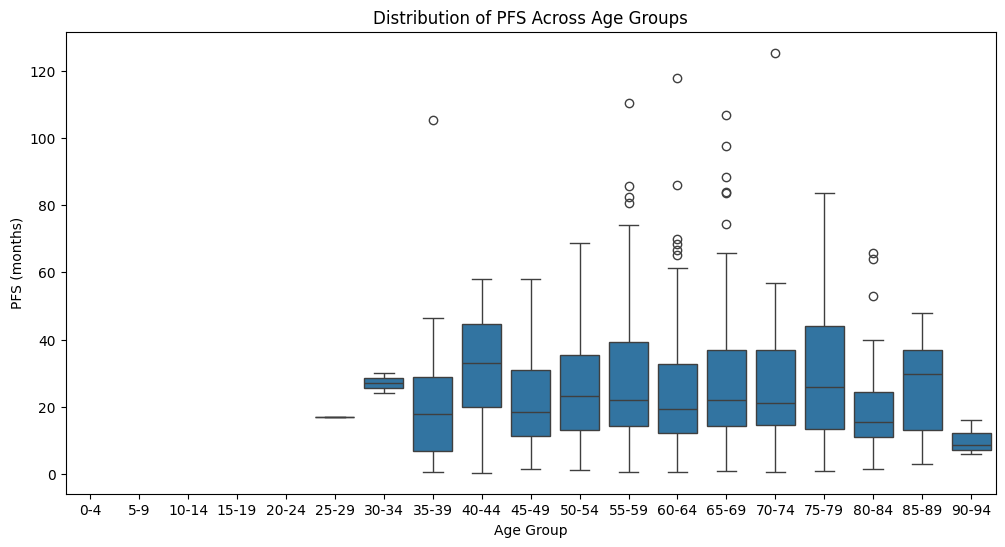

In [9]:
data['Age Group'] = pd.cut(data['Ageatdx'], bins=range(0, 100, 5), right=False, labels=[f"{i}-{i+4}" for i in range(0, 95, 5)])

# Filter out rows with missing PFS values
data_for_pfs = data.dropna(subset=['PFS'])

# Create a bar plot or box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='PFS', data=data_for_pfs)
plt.title('Distribution of PFS Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('PFS (months)')
plt.show()

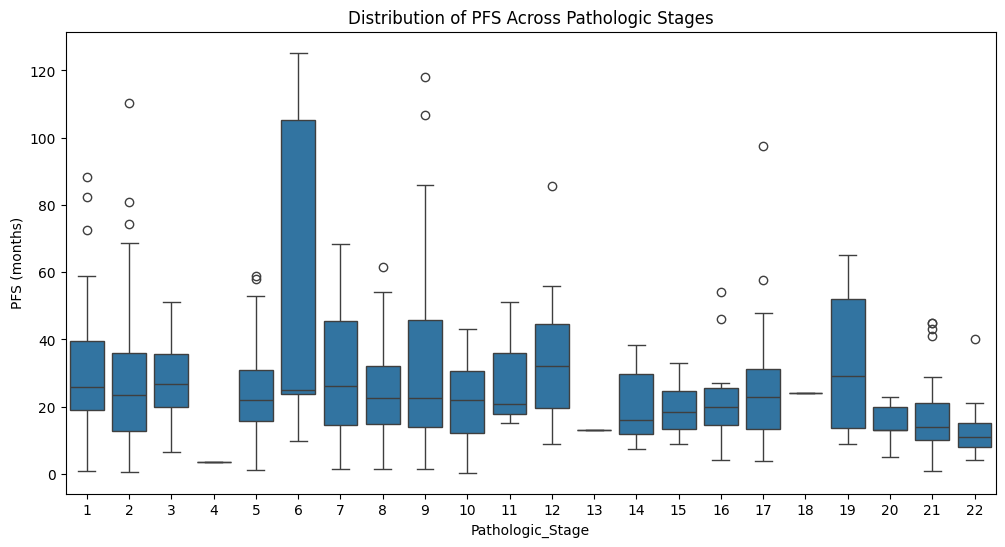

In [10]:
data_for_pfs = data.dropna(subset=['PFS', 'PathologicStage'])

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='PathologicStage', y='PFS', data=data_for_pfs)
plt.title('Distribution of PFS Across Pathologic Stages')
plt.xlabel('Pathologic_Stage')
plt.ylabel('PFS (months)')
plt.show()

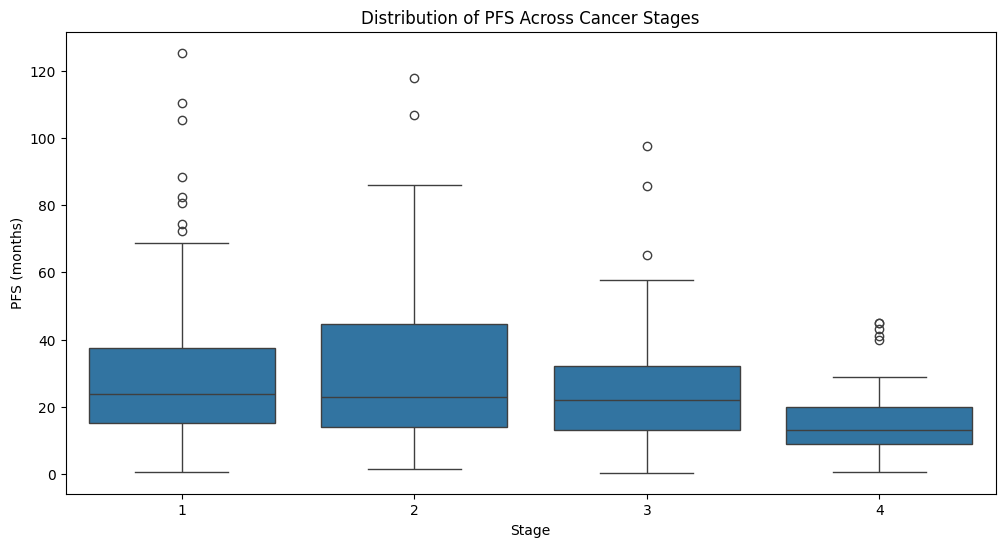

In [11]:
data_for_pfs = data.dropna(subset=['PFS', 'Stage'])

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stage', y='PFS', data=data_for_pfs)
plt.title('Distribution of PFS Across Cancer Stages')
plt.xlabel('Stage')
plt.ylabel('PFS (months)')
plt.show()

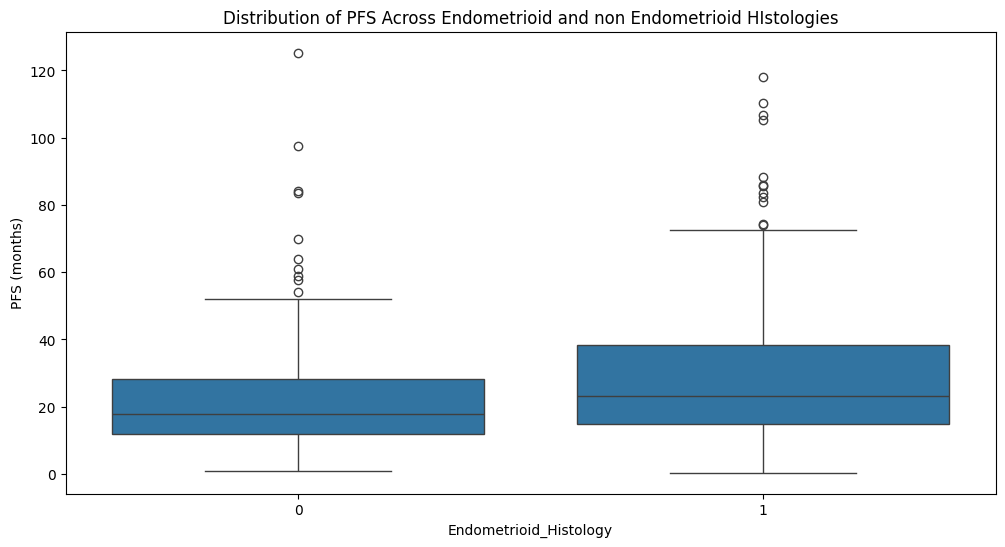

In [12]:
data_for_pfs = data.dropna(subset=['PFS', 'Endometrioid_Histology'])

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Endometrioid_Histology', y='PFS', data=data_for_pfs)
plt.title('Distribution of PFS Across Endometrioid and non Endometrioid HIstologies')
plt.xlabel('Endometrioid_Histology')
plt.ylabel('PFS (months)')
plt.show()

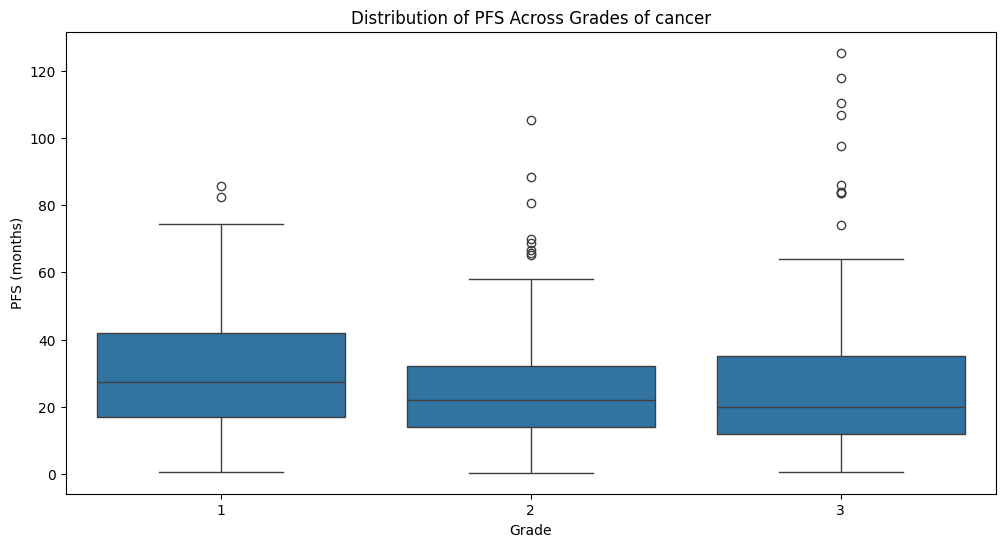

In [13]:
data_for_pfs = data.dropna(subset=['PFS', 'Grade'])

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Grade', y='PFS', data=data_for_pfs)
plt.title('Distribution of PFS Across Grades of cancer')
plt.xlabel('Grade')
plt.ylabel('PFS (months)')
plt.show()

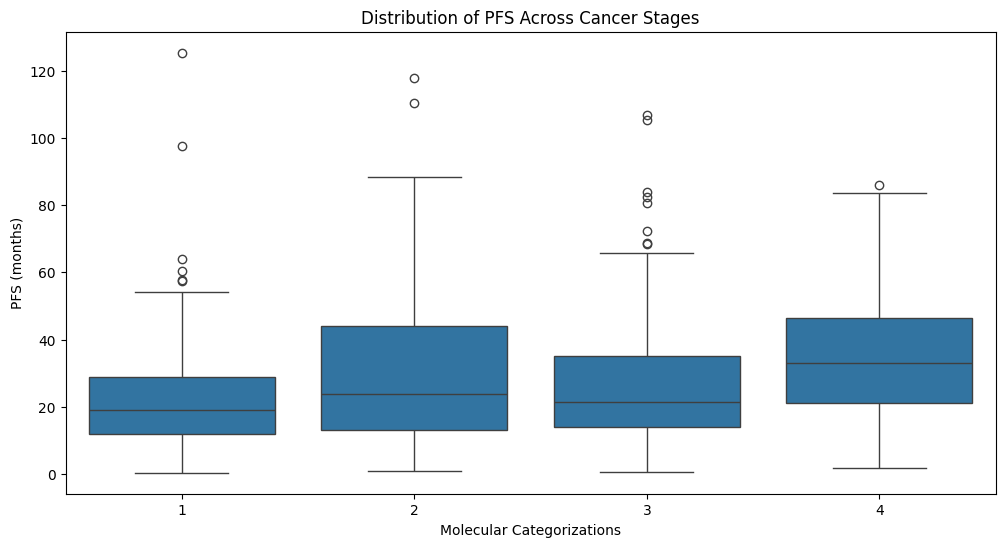

In [14]:
data_for_pfs = data.dropna(subset=['PFS', 'MolecularCategorization'])

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='MolecularCategorization', y='PFS', data=data_for_pfs)
plt.title('Distribution of PFS Across Cancer Stages')
plt.xlabel('Molecular Categorizations')
plt.ylabel('PFS (months)')
plt.show()